In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import missingno as msno

In [2]:
# setting de pandas opcion para que no aparzca mesajes "Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings..."" 
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

In [3]:
# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
# Primeras filas del dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Información sobre tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Estadísticas descriptivas básicas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Verificar dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 768 filas y 9 columnas


In [9]:
# Cantidad de valores faltantes por columna
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


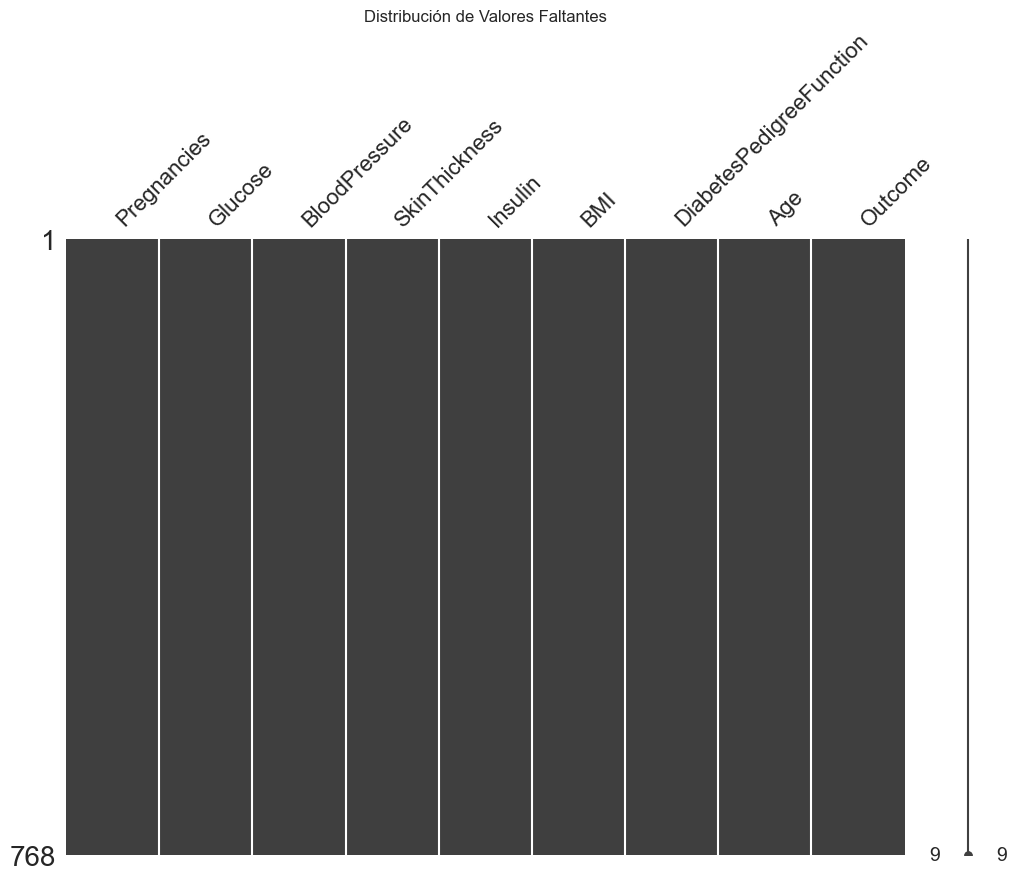

In [10]:
# Visualización de valores faltantes
msno.matrix(df, figsize=(12, 8))
plt.title('Distribución de Valores Faltantes')
plt.show()

In [11]:
# Porcentaje de valores faltantes
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

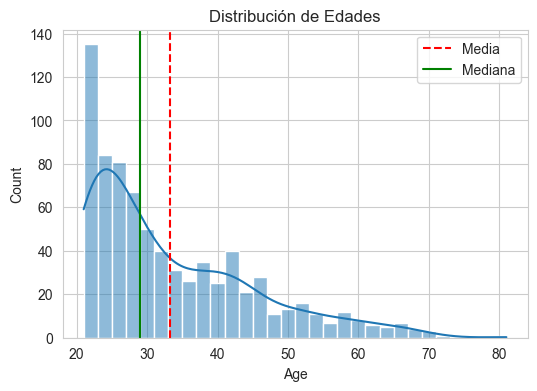

In [12]:
sns.histplot(df["Age"], kde=True, bins=30)
plt.title("Distribución de Edades")
plt.axvline(df["Age"].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df["Age"].median(), color='g', linestyle='-', label='Mediana')
plt.legend()
plt.show()

grafico tiene sentido edades +20 hasta 80

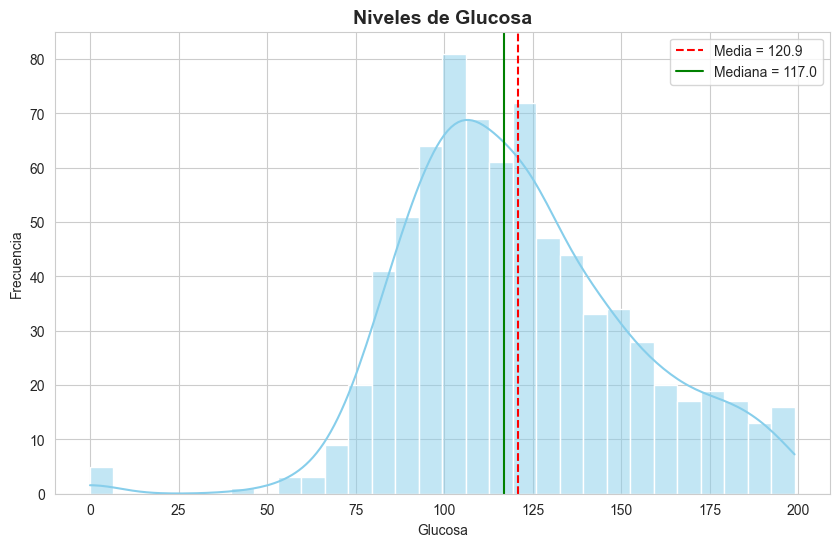

In [13]:
# Filtrar valores de glucosa válidos (excluyendo ceros, si quieres)
glucose = df["Glucose"]
# Si quieres excluir 0 usa: glucose = df[df["Glucose"] > 0]["Glucose"]

media = glucose.mean()
mediana = glucose.median()

plt.figure(figsize=(10,6))
sns.histplot(glucose, kde=True, bins=30, color="skyblue")

# Líneas de referencia
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.1f}')
plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana = {mediana:.1f}')

plt.title("Niveles de Glucosa", fontsize=14, fontweight="bold")
plt.xlabel("Glucosa")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


hay errores ya que hay pacientes con la Glucosa con valor 0 esto no es posible voy a verficar cada columna para ver esto.

grafico filtrando los valores 0

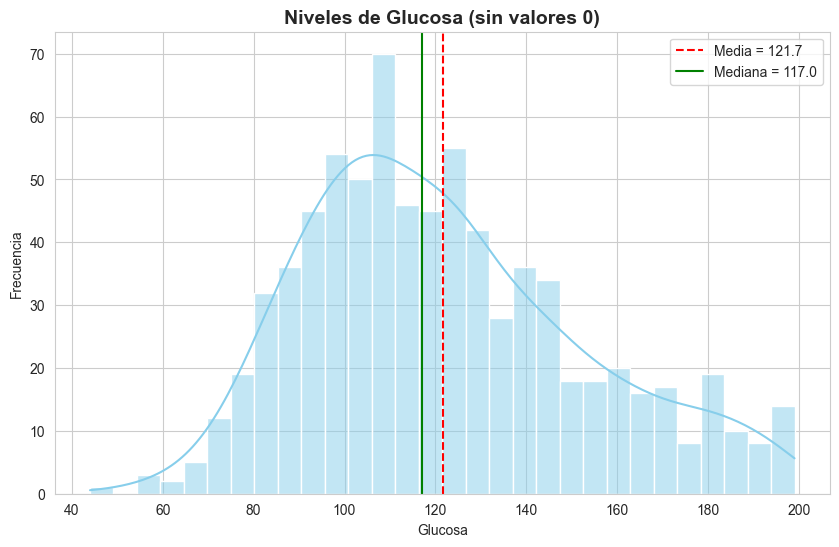

In [14]:
# Filtrar valores de glucosa > 0
glucose_valid = df[df["Glucose"] > 0]["Glucose"]

# Calcular media y mediana
media = glucose_valid.mean()
mediana = glucose_valid.median()

# Histograma con KDE
plt.figure(figsize=(10,6))
sns.histplot(glucose_valid, kde=True, bins=30, color="skyblue")

# Líneas de referencia
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.1f}')
plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana = {mediana:.1f}')

# Título y leyenda
plt.title("Niveles de Glucosa (sin valores 0)", fontsize=14, fontweight="bold")
plt.xlabel("Glucosa")
plt.ylabel("Frecuencia")
plt.legend()


plt.show()


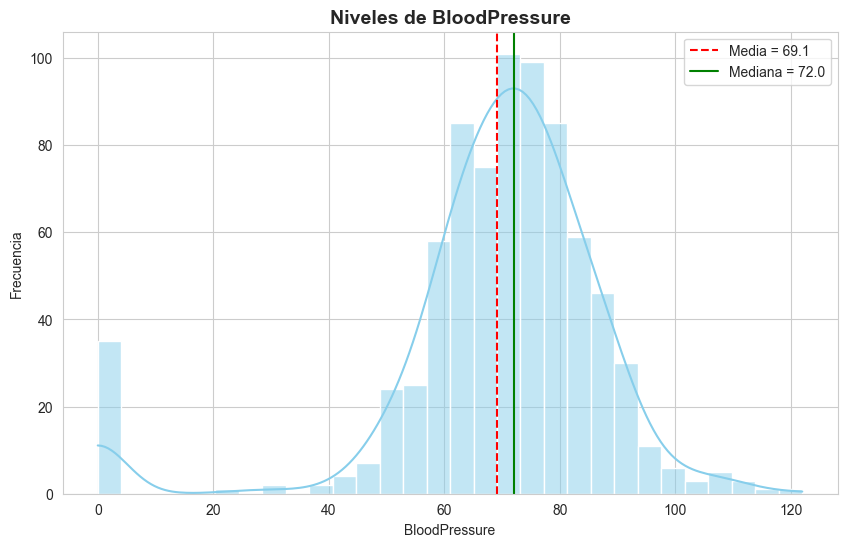

In [15]:
# Filtrar valores de BloodPressure válidos (excluyendo ceros, si quieres)
bloodpressure = df["BloodPressure"]

media = bloodpressure.mean()
mediana = bloodpressure.median()

plt.figure(figsize=(10,6))
sns.histplot(bloodpressure, kde=True, bins=30, color="skyblue")

# Líneas de referencia
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.1f}')
plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana = {mediana:.1f}')

plt.title("Niveles de BloodPressure", fontsize=14, fontweight="bold")
plt.xlabel("BloodPressure")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


aqui igual muchas personas con BloodPressure 0

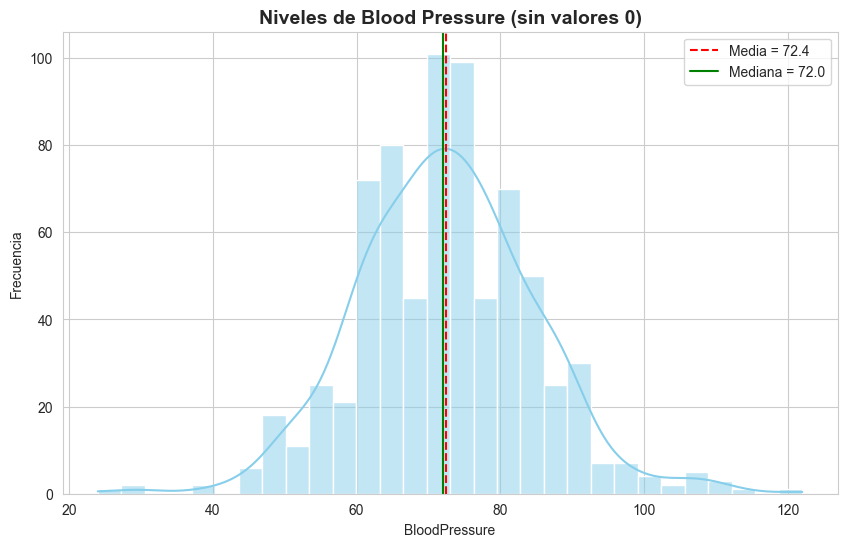

In [16]:
# Filtrar valores de BloodPressure > 0
bloodpressure_valid = df[df["BloodPressure"] > 0]["BloodPressure"]

# Calcular media y mediana
media = bloodpressure_valid.mean()
mediana = bloodpressure_valid.median()

# Histograma con KDE
plt.figure(figsize=(10,6))
sns.histplot(bloodpressure_valid, kde=True, bins=30, color="skyblue")

# Líneas de referencia
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.1f}')
plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana = {mediana:.1f}')

# Título y leyenda
plt.title("Niveles de Blood Pressure (sin valores 0)", fontsize=14, fontweight="bold")
plt.xlabel("BloodPressure")
plt.ylabel("Frecuencia")
plt.legend()


plt.show()

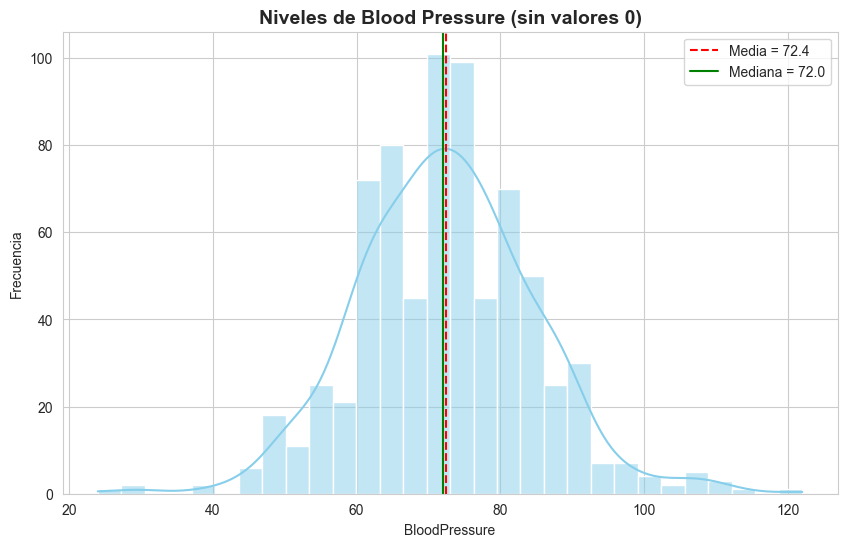

In [17]:
# Filtrar valores de BloodPressure > 0
bloodpressure_valid = df[df["BloodPressure"] > 0]["BloodPressure"]

# Calcular media y mediana
media = bloodpressure_valid.mean()
mediana = bloodpressure_valid.median()

# Histograma con KDE
plt.figure(figsize=(10,6))
sns.histplot(bloodpressure_valid, kde=True, bins=30, color="skyblue")

# Líneas de referencia
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.1f}')
plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana = {mediana:.1f}')

# Título y leyenda
plt.title("Niveles de Blood Pressure (sin valores 0)", fontsize=14, fontweight="bold")
plt.xlabel("BloodPressure")
plt.ylabel("Frecuencia")
plt.legend()


plt.show()

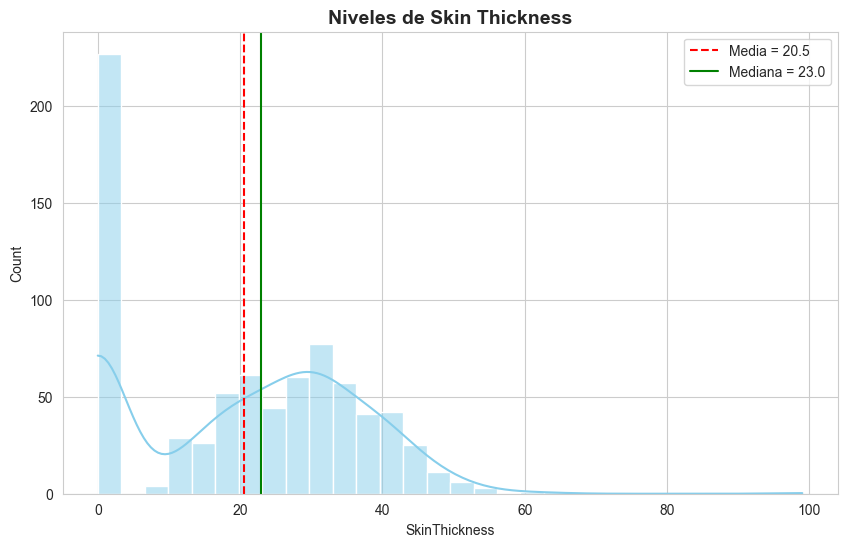

In [18]:
# Filtrar valores de SkinThickness válidos (excluyendo ceros, si quieres)
skinthickness = df["SkinThickness"]

media = skinthickness.mean()
mediana = skinthickness.median()

plt.figure(figsize=(10,6))
sns.histplot(skinthickness, kde=True, bins=30, color="skyblue")

# Líneas de referencia
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.1f}')
plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana = {mediana:.1f}')

plt.title("Niveles de Skin Thickness", fontsize=14, fontweight="bold")
plt.xlabel("SkinThickness")
plt.ylabel("Count")
plt.legend()
plt.show()


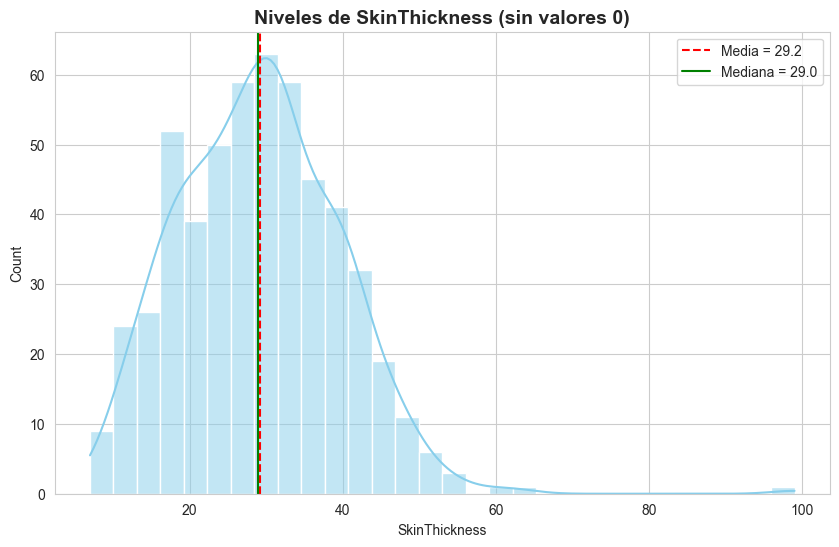

In [19]:
#skin thickness valid

# Filtrar valores de SkinThickness > 0
skinthickness_valid = df[df["SkinThickness"] > 0]["SkinThickness"]

# Calcular media y mediana
media = skinthickness_valid.mean()
mediana = skinthickness_valid.median()

# Histograma con KDE
plt.figure(figsize=(10,6))
sns.histplot(skinthickness_valid, kde=True, bins=30, color="skyblue")

# Líneas de referencia
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.1f}')
plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana = {mediana:.1f}')

# Título y leyenda
plt.title("Niveles de SkinThickness (sin valores 0)", fontsize=14, fontweight="bold")
plt.xlabel("SkinThickness")
plt.ylabel("Count")
plt.legend()


plt.show()

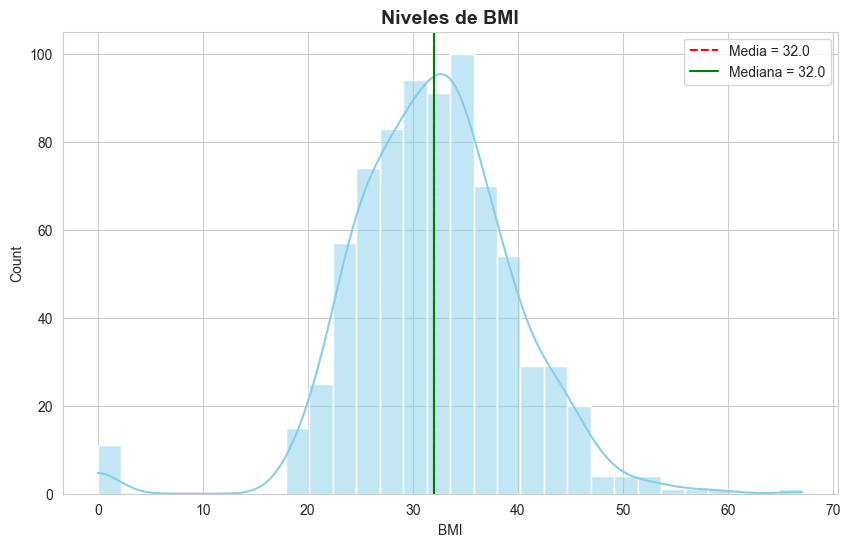

In [20]:
# Filtrar valores de BMI válidos (excluyendo ceros, si quieres)
bmi = df["BMI"]

media = bmi.mean()
mediana = bmi.median()

plt.figure(figsize=(10,6))
sns.histplot(bmi, kde=True, bins=30, color="skyblue")

# Líneas de referencia
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.1f}')
plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana = {mediana:.1f}')

plt.title("Niveles de BMI", fontsize=14, fontweight="bold")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.legend()
plt.show()

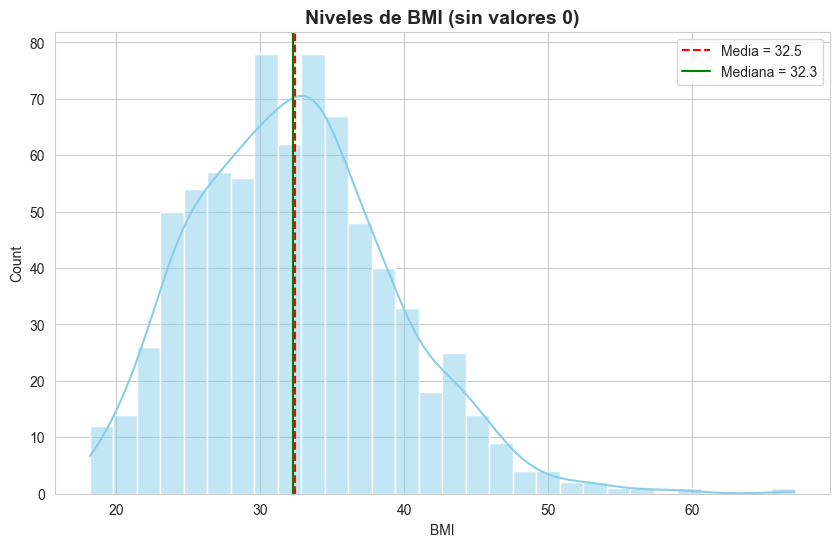

In [21]:
#BMI valid

# Filtrar valores de BMI > 0
bmi_valid = df[df["BMI"] > 0]["BMI"]

# Calcular media y mediana
media = bmi_valid.mean()
mediana = bmi_valid.median()

# Histograma con KDE
plt.figure(figsize=(10,6))
sns.histplot(bmi_valid, kde=True, bins=30, color="skyblue")

# Líneas de referencia
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.1f}')
plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana = {mediana:.1f}')

# Título y leyenda
plt.title("Niveles de BMI (sin valores 0)", fontsize=14, fontweight="bold")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.legend()


plt.show()

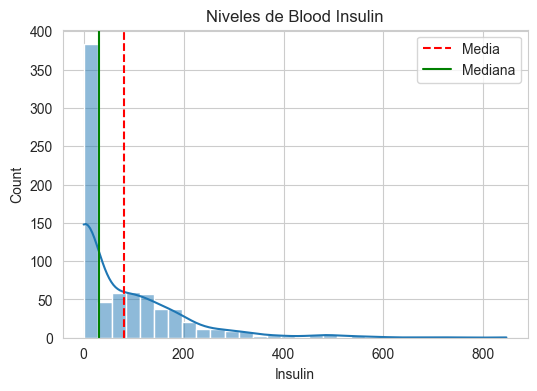

In [22]:
sns.histplot(df["Insulin"], kde=True, bins=30)
plt.title("Niveles de Blood Insulin")
plt.axvline(df["Insulin"].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df["Insulin"].median(), color='g', linestyle='-', label='Mediana')
plt.legend()
plt.show()

buscar los errores en datos donde varias columans tiene valor 0 como datos sospechosos

voy a verificar el outcome para saber cuantos realmente tiene Diabetis

In [23]:
cols_sospechosas = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
(df[cols_sospechosas] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

este dato muestra clarmete que hay muchos datos erronios 
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374 --> me parece muy elevado no se si 0 es un valor correcto pendiente consultarlo
BMI               11

cuántos pacientes diabéticos tienen registros sospechosos (ceros) en cada columna.

In [24]:
cols_sospechosas = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Filtrar solo personas con Outcome = 1
df_diabetes = df[df["Outcome"] == 1]

# Contar valores 0 en esas columnas solo para Outcome=1
(df_diabetes[cols_sospechosas] == 0).sum()


Glucose            2
BloodPressure     16
SkinThickness     88
Insulin          138
BMI                2
dtype: int64

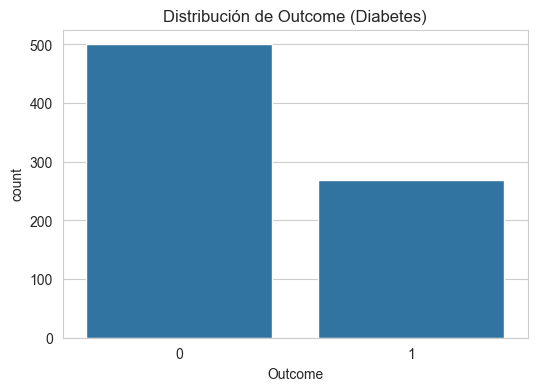

In [25]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribución de Outcome (Diabetes)")
plt.show()

numeros exactos del grafico

In [26]:
df["Outcome"].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

y porcentaje

In [27]:
df["Outcome"].value_counts(normalize=True) * 100


Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

los datos unidos

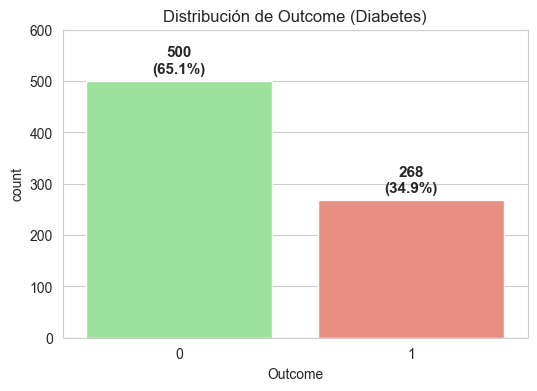

In [28]:
# Gráfico de barras con Outcome
ax = sns.countplot(x="Outcome", data=df, hue="Outcome", palette={0:"lightgreen", 1:"salmon"}, legend=False)

# Título
plt.title("Distribución de Outcome (Diabetes)")

# Total de registros
total = len(df)

# Añadir etiquetas encima de cada barra
for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count/total:.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f"{count}\n({percentage})", 
                (x, y + 10),   # 👈 +10 para subir la etiqueta
                ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.ylim(0, df["Outcome"].value_counts().max() + 100)  # margen extra arriba
plt.show()



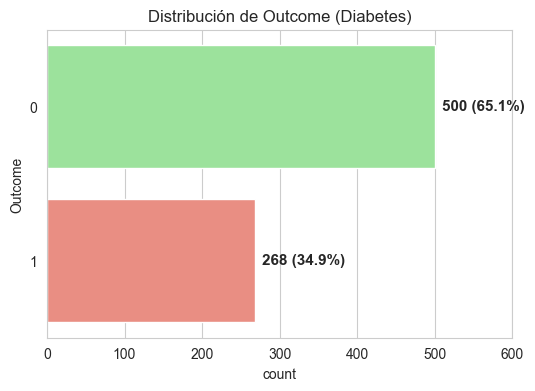

In [29]:
# Gráfico de barras HORIZONTAL con Outcome
ax = sns.countplot(y="Outcome", data=df, hue="Outcome", palette={0:"lightgreen", 1:"salmon"}, legend=False)

# Título
plt.title("Distribución de Outcome (Diabetes)")

# Total de registros
total = len(df)

# Añadir etiquetas al lado derecho de cada barra
for p in ax.patches:
    count = int(p.get_width())  # 👈 Cambio: get_width() en lugar de get_height()
    percentage = f"{100 * count/total:.1f}%"
    x = p.get_width()           # 👈 Cambio: get_width() para posición horizontal
    y = p.get_y() + p.get_height() / 2  # 👈 Cambio: centrar verticalmente
    ax.annotate(f"{count} ({percentage})", 
                (x + 10, y),    # 👈 Cambio: +10 en x para mover hacia la derecha
                ha="left", va="center", fontsize=11, fontweight="bold")  # 👈 Cambio: ha="left", va="center"

plt.xlim(0, df["Outcome"].value_counts().max() + 100)  # 👈 Cambio: xlim en lugar de ylim
plt.show()

In [30]:
# Filtrar solo personas con diabetes (Outcome = 1)
df_diabetes = df[df['Outcome'] == 1]

print(f"Total de personas con diabetes: {len(df_diabetes)}")
print(f"Rango de edades: {df_diabetes['Age'].min()} - {df_diabetes['Age'].max()}")
print(f"Rango de glucosa: {df_diabetes['Glucose'].min()} - {df_diabetes['Glucose'].max()}")

Total de personas con diabetes: 268
Rango de edades: 21 - 70
Rango de glucosa: 0 - 199


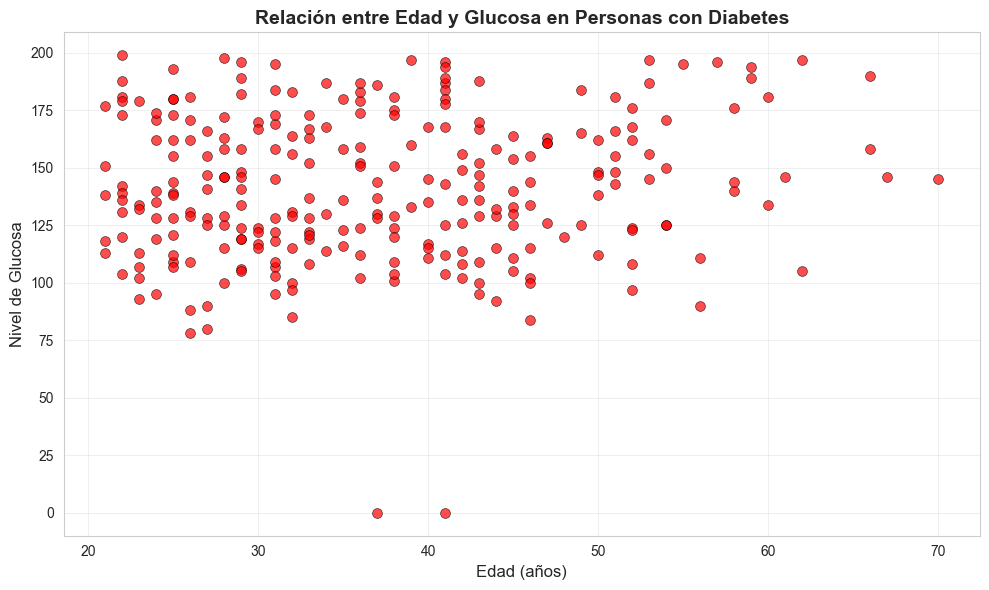

In [31]:
# OPCIÓN 1: Gráfico de dispersión (Scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(df_diabetes['Age'], df_diabetes['Glucose'], 
           alpha=0.7, color='red', s=50, edgecolors='black', linewidth=0.5)
plt.title('Relación entre Edad y Glucosa en Personas con Diabetes', fontsize=14, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Nivel de Glucosa', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

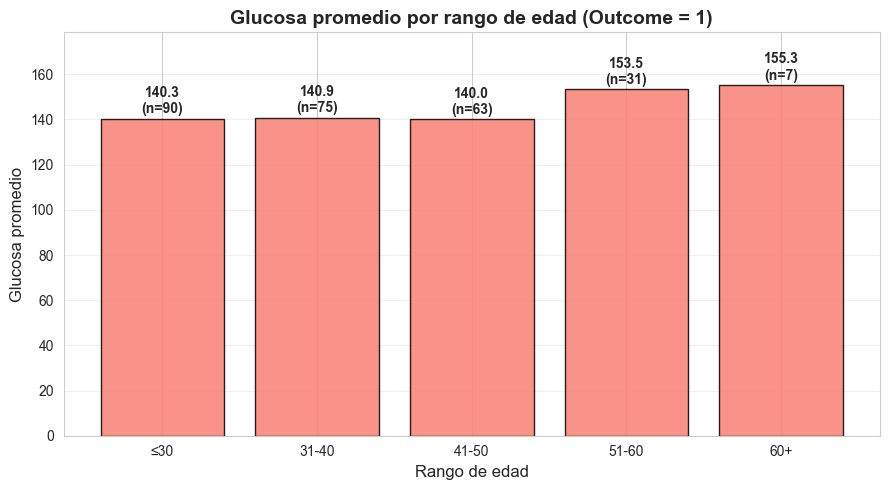

In [32]:
# OPCIÓN 2: Crear rangos de edad y hacer gráfico de barras
# 1) Subconjunto de personas con diabetes (y copia para evitar el warning)
df_diabetes = df[df["Outcome"] == 1].copy()

# 2) Rangos de edad
bins_edad   = [0, 30, 40, 50, 60, np.inf]
labels_edad = ['≤30', '31-40', '41-50', '51-60', '60+']
df_diabetes["Rango_Edad"] = pd.cut(
    df_diabetes["Age"], bins=bins_edad, labels=labels_edad,
    include_lowest=True, right=True
)

# 3) Glucosa promedio por rango (excluyendo 0)
glucose_por_edad = (
    df_diabetes.loc[df_diabetes["Glucose"] > 0]
               .groupby("Rango_Edad", observed=True)["Glucose"]
               .agg(mean="mean", count="size")
               .reset_index()
)

# 4) Gráfico
plt.figure(figsize=(9, 5))
ax = plt.bar(glucose_por_edad["Rango_Edad"].astype(str),
             glucose_por_edad["mean"],
             color='salmon', alpha=0.85, edgecolor='black', linewidth=1)

plt.title('Glucosa promedio por rango de edad (Outcome = 1)', fontsize=14, fontweight='bold')
plt.xlabel('Rango de edad', fontsize=12)
plt.ylabel('Glucosa promedio', fontsize=12)

# Etiquetas (media y n)
for rect, n, m in zip(ax, glucose_por_edad["count"], glucose_por_edad["mean"]):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 1,
             f'{m:.1f}\n(n={n})', ha='center', va='bottom', fontweight='bold')

plt.ylim(0, max(glucose_por_edad["mean"]) * 1.15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [33]:
#verificar que se creo ragos de edad de forma correcta
print(df_diabetes.columns)
print(df_diabetes["Rango_Edad"].head())


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Rango_Edad'],
      dtype='object')
0    41-50
2    31-40
4    31-40
6      ≤30
8    51-60
Name: Rango_Edad, dtype: category
Categories (5, object): ['≤30' < '31-40' < '41-50' < '51-60' < '60+']


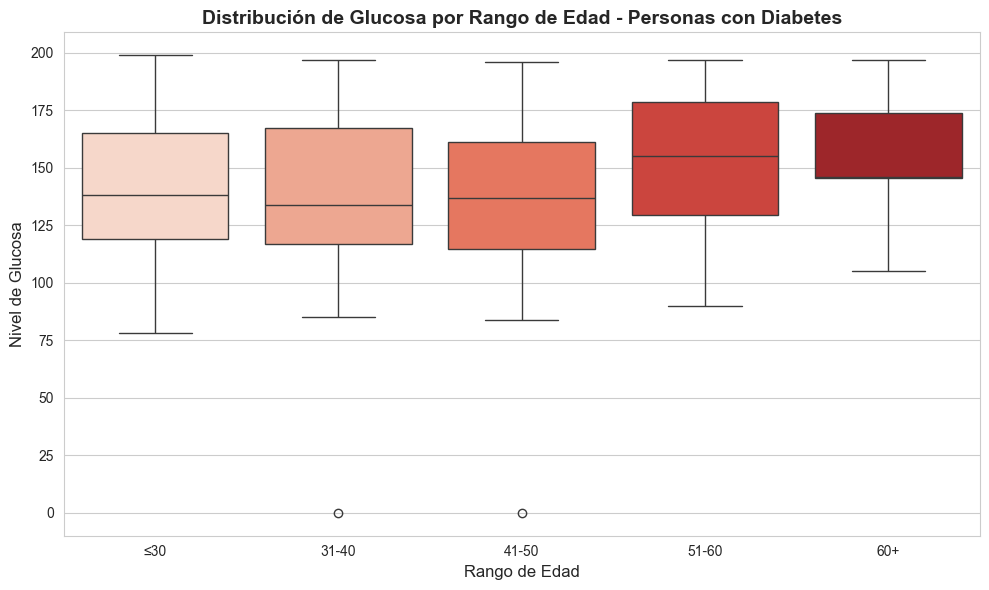

In [34]:
# OPCIÓN 3: Boxplot - Distribución de glucosa por rango de edad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_diabetes, x='Rango_Edad', y='Glucose',
            hue='Rango_Edad', palette='Reds', legend=False)
plt.title('Distribución de Glucosa por Rango de Edad - Personas con Diabetes', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Nivel de Glucosa', fontsize=12)
plt.tight_layout()
plt.show()



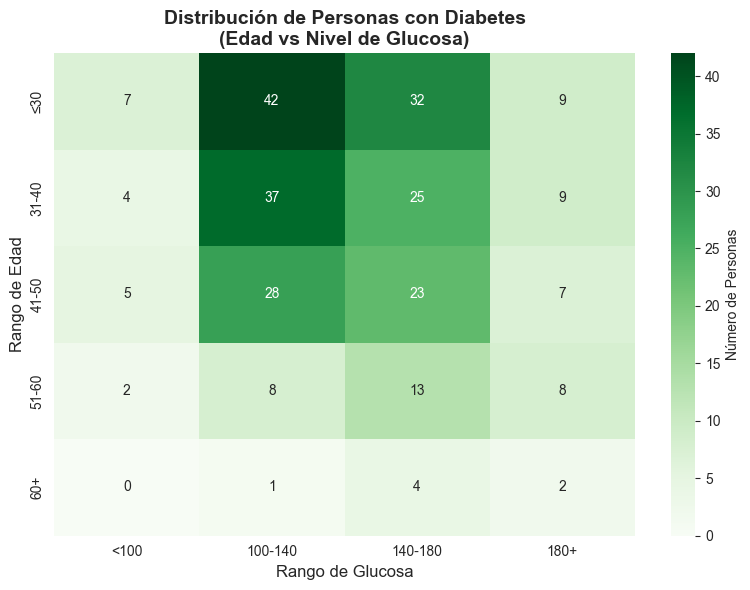

In [35]:
# OPCIÓN 4: Heatmap - Contar personas por edad y nivel de glucosa
# Crear rangos de glucosa también
bins_glucose = [0, 100, 140, 180, 200]
labels_glucose = ['<100', '100-140', '140-180', '180+']
df_diabetes['Rango_Glucose'] = pd.cut(df_diabetes['Glucose'], bins=bins_glucose, labels=labels_glucose)

# Crear tabla cruzada
tabla_cruzada = pd.crosstab(df_diabetes['Rango_Edad'], df_diabetes['Rango_Glucose'], margins=True)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_cruzada.iloc[:-1, :-1], annot=True, fmt='d', cmap='Greens', 
            cbar_kws={'label': 'Número de Personas'})
plt.title('Distribución de Personas con Diabetes\n(Edad vs Nivel de Glucosa)', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Glucosa', fontsize=12)
plt.ylabel('Rango de Edad', fontsize=12)
plt.tight_layout()
plt.show()

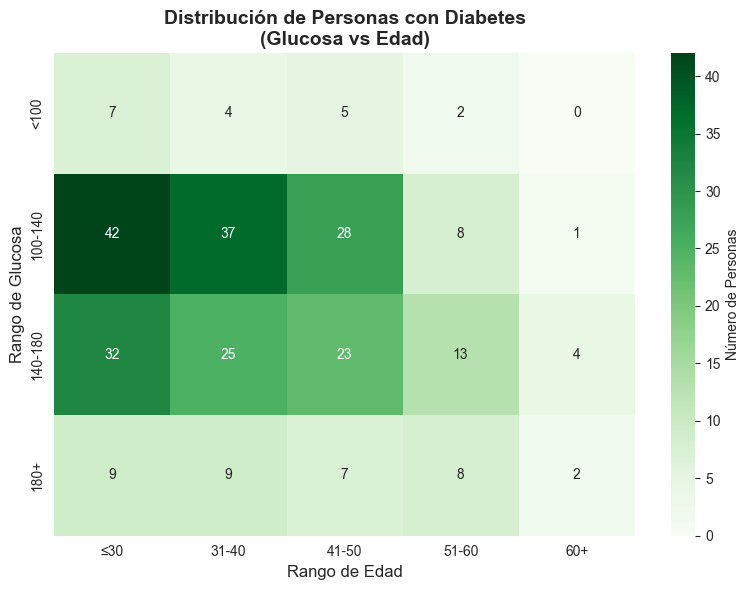

In [36]:
# Tabla cruzada (sin fila/columna de totales)
tabla_cruzada = pd.crosstab(df_diabetes['Rango_Edad'],
                            df_diabetes['Rango_Glucose'])

# Transponer
tabla_transpuesta = tabla_cruzada.T

# Heatmap transpuesto
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_transpuesta, annot=True, fmt='d', cmap='Greens',
            cbar_kws={'label': 'Número de Personas'})

plt.title('Distribución de Personas con Diabetes\n(Glucosa vs Edad)', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Rango de Glucosa', fontsize=12)
plt.tight_layout()
plt.show()


In [37]:
# Crear tabla cruzada SIMPLE
tabla_cruzada = pd.crosstab(df_diabetes['Rango_Edad'], df_diabetes['Rango_Glucose'])

print("TABLA DE DATOS:")
print("="*50)
print(tabla_cruzada)

TABLA DE DATOS:
Rango_Glucose  <100  100-140  140-180  180+
Rango_Edad                                 
≤30               7       42       32     9
31-40             4       37       25     9
41-50             5       28       23     7
51-60             2        8       13     8
60+               0        1        4     2


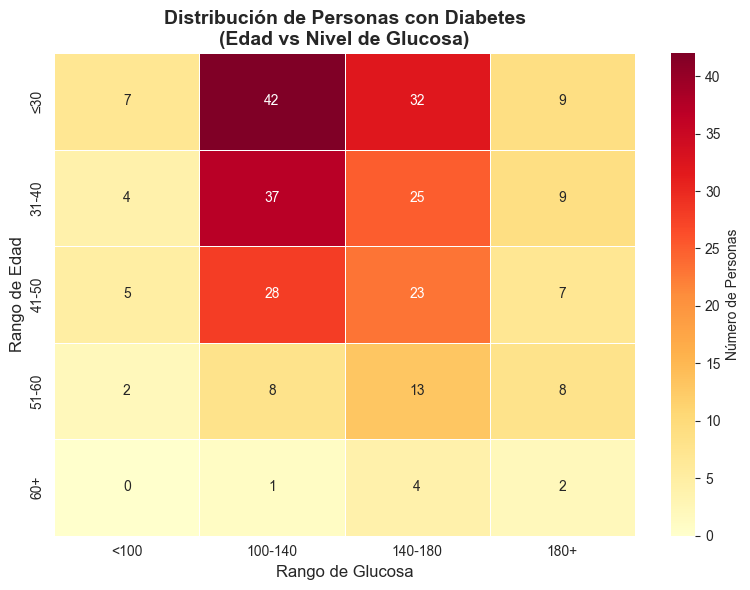

In [38]:
# OPCIÓN 1: Heatmap simple y claro
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_cruzada, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'label': 'Número de Personas'}, linewidths=0.5)
plt.title('Distribución de Personas con Diabetes\n(Edad vs Nivel de Glucosa)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Rango de Glucosa', fontsize=12)
plt.ylabel('Rango de Edad', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

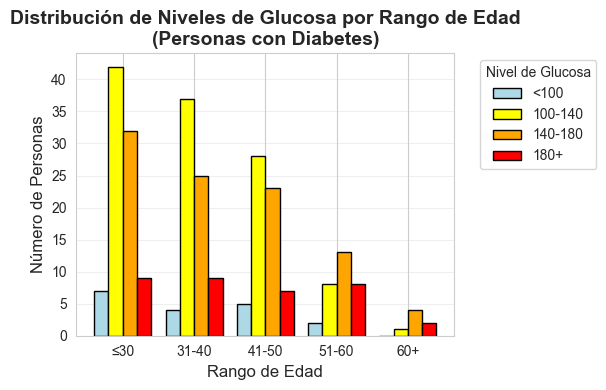

In [39]:
# OPCIÓN 2: Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
tabla_cruzada.plot(kind='bar', color=['lightblue', 'yellow', 'orange', 'red'], 
                   width=0.8, edgecolor='black')
plt.title('Distribución de Niveles de Glucosa por Rango de Edad\n(Personas con Diabetes)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Número de Personas', fontsize=12)
plt.legend(title='Nivel de Glucosa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

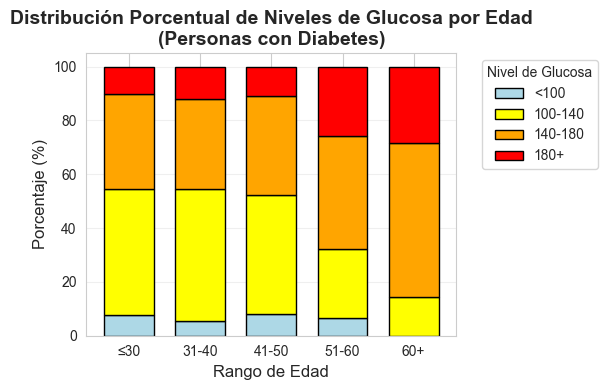

In [40]:
# OPCIÓN 3: Gráfico de barras apiladas (100%)
plt.figure(figsize=(10, 6))
tabla_porcentajes = tabla_cruzada.div(tabla_cruzada.sum(axis=1), axis=0) * 100
tabla_porcentajes.plot(kind='bar', stacked=True, 
                       color=['lightblue', 'yellow', 'orange', 'red'],
                       edgecolor='black', width=0.7)
plt.title('Distribución Porcentual de Niveles de Glucosa por Edad\n(Personas con Diabetes)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(title='Nivel de Glucosa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [41]:
# Crear subset de personas con diabetes
df_diabetes = df[df["Outcome"] == 1].copy()

# Rangos de edad 
bins_edad   = [0, 30, 40, 50, 60, np.inf]
labels_edad = ['≤30', '31-40', '41-50', '51-60', '60+']
df_diabetes["Rango_Edad"] = pd.cut(
    df_diabetes["Age"], bins=bins_edad, labels=labels_edad,
    include_lowest=True, right=True
)

# Crear rangos de glucosa
bins_glucose = [0, 100, 140, 180, 200]
labels_glucose = ['<100', '100-140', '140-180', '180+']
df_diabetes['Rango_Glucose'] = pd.cut(
    df_diabetes['Glucose'], bins=bins_glucose, labels=labels_glucose
)

# Mostrar resumen en consola
print("\n" + "="*50)
print("RESUMEN DETALLADO:")
print("="*50)

total_diabetes = len(df_diabetes)
print(f"Total personas con diabetes: {total_diabetes}")

# Abrir archivo solo una vez y escribir todo dentro
with open("resumen_diabetes.txt", "w", encoding="utf-8") as f:
    f.write("RESUMEN DETALLADO\n")
    f.write("="*50 + "\n")
    f.write(f"Total personas con diabetes: {total_diabetes}\n\n")

    for edad in labels_edad:
        personas_edad = df_diabetes[df_diabetes['Rango_Edad'] == edad]
        if len(personas_edad) > 0:
            texto = f"\n{edad}: {len(personas_edad)} personas\n"
            f.write(texto)

            glucose_counts = personas_edad['Rango_Glucose'].value_counts().sort_index()
            for glucose_range in labels_glucose:
                if glucose_range in glucose_counts.index:
                    count = glucose_counts[glucose_range]
                    percentage = (count / len(personas_edad)) * 100
                    linea = f"  - {glucose_range}: {count} personas ({percentage:.1f}%)\n"
                    f.write(linea)

# Mostrar con scroll en Jupyter
from IPython.display import display, HTML
with open("resumen_diabetes.txt", "r", encoding="utf-8") as f:
    contenido = f.read()

display(HTML(f"<div style='max-height:300px;overflow:auto;white-space:pre'>{contenido}</div>"))


RESUMEN DETALLADO:
Total personas con diabetes: 268


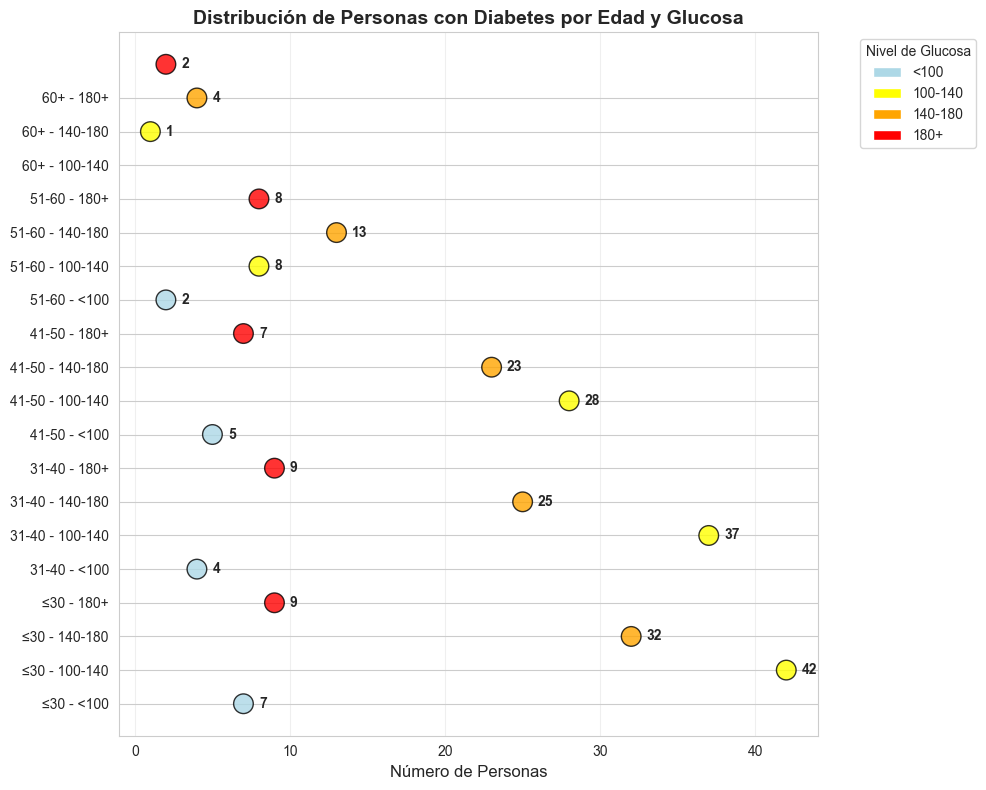

In [42]:
# OPCIÓN 5: Gráfico de puntos (dot plot)
fig, ax = plt.subplots(figsize=(10, 8))

# Preparar datos para el dot plot
y_positions = []
x_values = []
colors = []
labels_plot = []

color_map = {'<100': 'lightblue', '100-140': 'yellow', '140-180': 'orange', '180+': 'red'}
y_pos = 0

for edad in labels_edad:
    for glucose_range in labels_glucose:
        if glucose_range in tabla_cruzada.columns and edad in tabla_cruzada.index:
            count = tabla_cruzada.loc[edad, glucose_range]
            if count > 0:
                y_positions.append(y_pos)
                x_values.append(count)
                colors.append(color_map[glucose_range])
                labels_plot.append(f"{edad} - {glucose_range}")
                
                # Añadir etiqueta con el número
                ax.text(count + 1, y_pos, str(count), 
                       va='center', fontweight='bold', fontsize=10)
        y_pos += 1

# Crear el scatter plot
scatter = ax.scatter(x_values, y_positions, c=colors, s=200, alpha=0.8, edgecolors='black')

ax.set_yticks(range(len(labels_plot)))
ax.set_yticklabels(labels_plot)
ax.set_xlabel('Número de Personas', fontsize=12)
ax.set_title('Distribución de Personas con Diabetes por Edad y Glucosa', 
             fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Crear leyenda personalizada
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_map[glucose], label=glucose) 
                   for glucose in labels_glucose]
ax.legend(handles=legend_elements, title='Nivel de Glucosa', 
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [43]:
# ESTADÍSTICAS RESUMEN
print("\n" + "="*60)
print("ESTADÍSTICAS DE PERSONAS CON DIABETES (Outcome = 1):")
print("="*60)
print("\nGlucosa promedio por rango de edad:")
print(glucose_por_edad)

print("\nTabla cruzada completa:")
print(tabla_cruzada)

print(f"\nEdad promedio de personas con diabetes: {df_diabetes['Age'].mean():.1f} años")
print(f"Glucosa promedio de personas con diabetes: {df_diabetes['Glucose'].mean():.1f}")


ESTADÍSTICAS DE PERSONAS CON DIABETES (Outcome = 1):

Glucosa promedio por rango de edad:
  Rango_Edad        mean  count
0        ≤30  140.322222     90
1      31-40  140.853333     75
2      41-50  140.000000     63
3      51-60  153.451613     31
4        60+  155.285714      7

Tabla cruzada completa:
Rango_Glucose  <100  100-140  140-180  180+
Rango_Edad                                 
≤30               7       42       32     9
31-40             4       37       25     9
41-50             5       28       23     7
51-60             2        8       13     8
60+               0        1        4     2

Edad promedio de personas con diabetes: 37.1 años
Glucosa promedio de personas con diabetes: 141.3


voy a trabajar con un dataset nuevo donde elimino los datos sospechosos

In [44]:
# 1. Definir las columnas sospechosas
cols_sospechosas = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

#2. Filtrar solo personas con Outcome = 1
df_diabetes = df[df["Outcome"] == 1].copy()

#3. Usamos .loc[] y .all(axis=1) para asegurarnos de que todas las condiciones se cumplen en la fila.
df_diabetes_limpio = df_diabetes.loc[(df_diabetes[cols_sospechosas] != 0).all(axis=1)].copy()

#4. 4. Comprobar cuántos registros tienes antes y después
print("Personas con diabetes (Outcome=1):", len(df_diabetes))
print("Personas con diabetes SIN datos sospechosos:", len(df_diabetes_limpio))

#5. Revisar cuántas filas eliminaste
print("Filas eliminadas:", len(df_diabetes) - len(df_diabetes_limpio))


Personas con diabetes (Outcome=1): 268
Personas con diabetes SIN datos sospechosos: 130
Filas eliminadas: 138


In [45]:
# ver dataset limpio
df_diabetes_limpio.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1


In [46]:
# 1. Definir columnas sospechosas
cols_sospechosas = ["Glucose", "BloodPressure", "SkinThickness", "BMI"]

# 2. Crear dataset limpio (sin filtrar Outcome)
df_limpio = df.loc[(df[cols_sospechosas] != 0).all(axis=1)].copy()

# 3. Revisar tamaños
print("Total registros originales:", len(df))
print("Total registros después de limpiar:", len(df_limpio))
print("Registros eliminados:", len(df) - len(df_limpio))


Total registros originales: 768
Total registros después de limpiar: 532
Registros eliminados: 236


In [47]:
# ver dataset limpio
df_limpio.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1


<Figure size 1000x600 with 0 Axes>

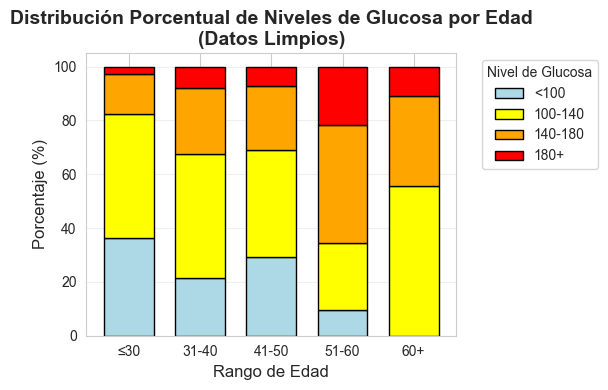

In [48]:
# Definir rangos de edad
bins_edad   = [0, 30, 40, 50, 60, np.inf]
labels_edad = ['≤30', '31-40', '41-50', '51-60', '60+']
df_limpio["Rango_Edad"] = pd.cut(
    df_limpio["Age"], bins=bins_edad, labels=labels_edad,
    include_lowest=True, right=True
)

# Definir rangos de glucosa
bins_glucose = [0, 100, 140, 180, 200]
labels_glucose = ['<100', '100-140', '140-180', '180+']
df_limpio["Rango_Glucose"] = pd.cut(
    df_limpio["Glucose"], bins=bins_glucose, labels=labels_glucose
)

# Crear tabla cruzada (edad vs glucosa) con df_limpio
tabla_cruzada = pd.crosstab(df_limpio['Rango_Edad'], df_limpio['Rango_Glucose'])

# Convertir a porcentajes por fila (100% stacked)
tabla_porcentajes = tabla_cruzada.div(tabla_cruzada.sum(axis=1), axis=0) * 100

# Gráfico de barras apiladas
plt.figure(figsize=(10, 6))
tabla_porcentajes.plot(kind='bar', stacked=True,
                       color=['lightblue', 'yellow', 'orange', 'red'],
                       edgecolor='black', width=0.7)

plt.title('Distribución Porcentual de Niveles de Glucosa por Edad\n(Datos Limpios)',
          fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend(title='Nivel de Glucosa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

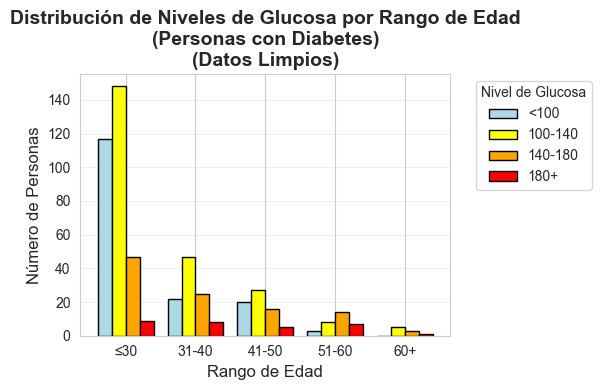

In [49]:
# OPCIÓN 2: Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
tabla_cruzada.plot(kind='bar', color=['lightblue', 'yellow', 'orange', 'red'], 
                   width=0.8, edgecolor='black')
plt.title('Distribución de Niveles de Glucosa por Rango de Edad\n(Personas con Diabetes)\n(Datos Limpios)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Número de Personas', fontsize=12)
plt.legend(title='Nivel de Glucosa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

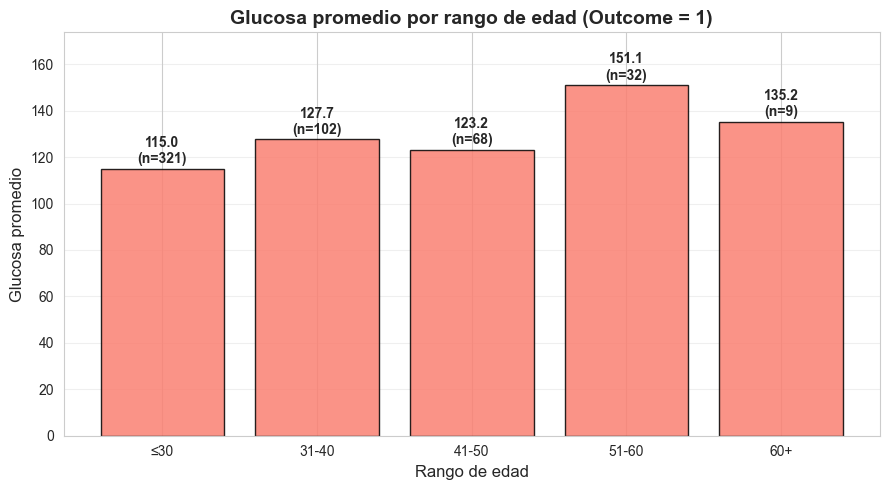

In [50]:
# OPCIÓN 2: Crear rangos de edad y hacer gráfico de barras
# 1) Subconjunto de personas con diabetes (y copia para evitar el warning)
#df_diabetes = df[df["Outcome"] == 1].copy()
df_limpio.head()

# 2) Rangos de edad
bins_edad   = [0, 30, 40, 50, 60, np.inf]
labels_edad = ['≤30', '31-40', '41-50', '51-60', '60+']
df_limpio["Rango_Edad"] = pd.cut(
    df_limpio["Age"], bins=bins_edad, labels=labels_edad,
    include_lowest=True, right=True
)

# 3) Glucosa promedio por rango (excluyendo 0)
glucose_por_edad = (
    df_limpio.loc[df_limpio["Glucose"] > 0]
               .groupby("Rango_Edad", observed=True)["Glucose"]
               .agg(mean="mean", count="size")
               .reset_index()
)

# 4) Gráfico
plt.figure(figsize=(9, 5))
ax = plt.bar(glucose_por_edad["Rango_Edad"].astype(str),
             glucose_por_edad["mean"],
             color='salmon', alpha=0.85, edgecolor='black', linewidth=1)

plt.title('Glucosa promedio por rango de edad (Outcome = 1)', fontsize=14, fontweight='bold')
plt.xlabel('Rango de edad', fontsize=12)
plt.ylabel('Glucosa promedio', fontsize=12)

# Etiquetas (media y n)
for rect, n, m in zip(ax, glucose_por_edad["count"], glucose_por_edad["mean"]):
    plt.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 1,
             f'{m:.1f}\n(n={n})', ha='center', va='bottom', fontweight='bold')

plt.ylim(0, max(glucose_por_edad["mean"]) * 1.15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [51]:
df_limpio.head()

# Mostrar resumen en consola
print("\n" + "="*50)
print("RESUMEN DETALLADO Datos Limpios:")
print("="*50)

total_diabetes = len(df_limpio)
print(f"Total registros en df_limpio: {total_diabetes}")

# Abrir archivo solo una vez y escribir todo dentro
with open("resumen_diabetes.txt", "w", encoding="utf-8") as f:
    f.write("RESUMEN DETALLADO Datos Limpios\n")
    f.write("="*50 + "\n")
    f.write(f"Total registros en df_limpio: {total_diabetes}\n\n")

    for edad in labels_edad:
        personas_edad = df_limpio[df_limpio['Rango_Edad'] == edad]  # 🔹 ahora con df_limpio
        if len(personas_edad) > 0:
            texto = f"\n{edad}: {len(personas_edad)} personas\n"
            f.write(texto)

            glucose_counts = personas_edad['Rango_Glucose'].value_counts().sort_index()
            for glucose_range in labels_glucose:
                if glucose_range in glucose_counts.index:
                    count = glucose_counts[glucose_range]
                    percentage = (count / len(personas_edad)) * 100
                    linea = f"  - {glucose_range}: {count} personas ({percentage:.1f}%)\n"
                    f.write(linea)

# Mostrar con scroll en Jupyter
from IPython.display import display, HTML
with open("resumen_diabetes.txt", "r", encoding="utf-8") as f:
    contenido = f.read()

display(HTML(f"<div style='max-height:300px;overflow:auto;white-space:pre'>{contenido}</div>"))



RESUMEN DETALLADO Datos Limpios:
Total registros en df_limpio: 532


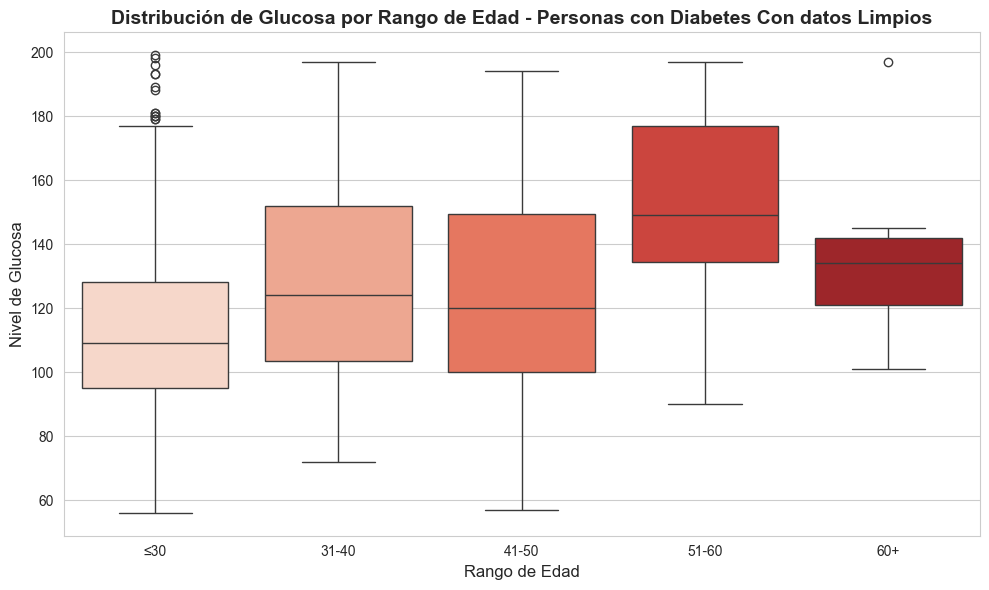

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_limpio, x='Rango_Edad', y='Glucose',
            hue='Rango_Edad', palette='Reds', legend=False)
plt.title('Distribución de Glucosa por Rango de Edad - Personas con Diabetes Con datos Limpios', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Nivel de Glucosa', fontsize=12)
plt.tight_layout()
plt.show()

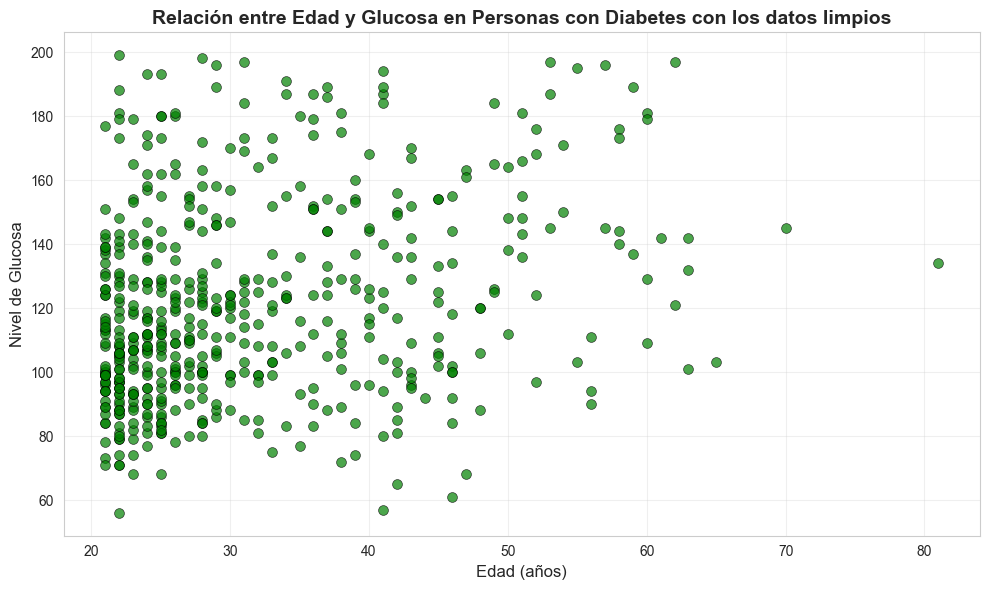

In [53]:
# OPCIÓN 1: Gráfico de dispersión (Scatter plot) con los datos limpio
plt.figure(figsize=(10, 6))
plt.scatter(df_limpio['Age'], df_limpio['Glucose'], 
           alpha=0.7, color='green', s=50, edgecolors='black', linewidth=0.5)
plt.title('Relación entre Edad y Glucosa en Personas con Diabetes con los datos limpios', fontsize=14, fontweight='bold')
plt.xlabel('Edad (años)', fontsize=12)
plt.ylabel('Nivel de Glucosa', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

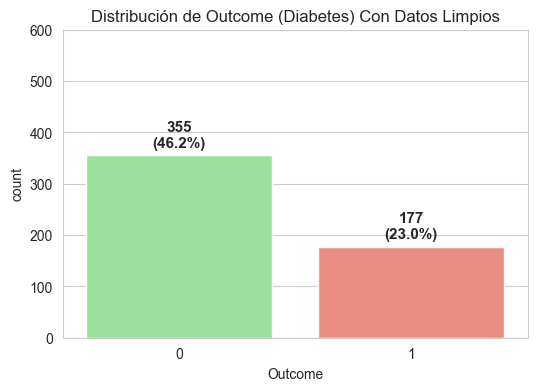

In [54]:
# Gráfico de barras con Outcome
ax = sns.countplot(x="Outcome", data=df_limpio, hue="Outcome", palette={0:"lightgreen", 1:"salmon"}, legend=False)

# Título
plt.title("Distribución de Outcome (Diabetes) Con Datos Limpios")

# Total de registros
total = len(df)

# Añadir etiquetas encima de cada barra
for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count/total:.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f"{count}\n({percentage})", 
                (x, y + 10),   # 👈 +10 para subir la etiqueta
                ha="center", va="bottom", fontsize=11, fontweight="bold")

plt.ylim(0, df["Outcome"].value_counts().max() + 100)  # margen extra arriba
plt.show()

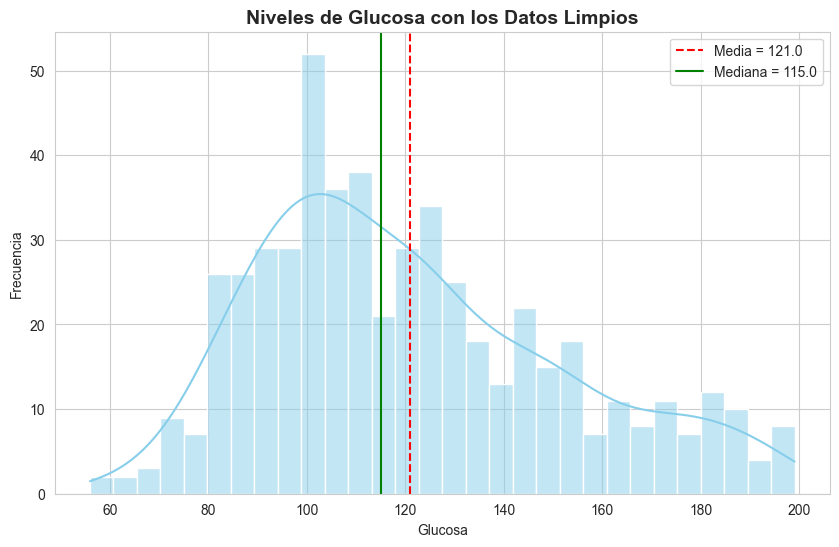

In [55]:
# Filtrar valores de glucosa válidos (excluyendo ceros, si quieres)
glucose = df_limpio["Glucose"]
# Si quieres excluir 0 usa: glucose = df[df["Glucose"] > 0]["Glucose"]

media = glucose.mean()
mediana = glucose.median()

plt.figure(figsize=(10,6))
sns.histplot(glucose, kde=True, bins=30, color="skyblue")

# Líneas de referencia
plt.axvline(media, color='r', linestyle='--', label=f'Media = {media:.1f}')
plt.axvline(mediana, color='g', linestyle='-', label=f'Mediana = {mediana:.1f}')

plt.title("Niveles de Glucosa con los Datos Limpios", fontsize=14, fontweight="bold")
plt.xlabel("Glucosa")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()